In [49]:
# Load Data 
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import pandas as pd

fraud_data =pd.read_csv('../data/raw_data/Fraud_Data.csv')
credit_data = pd.read_csv('../data/raw_data/creditcard.csv')
Ip_data = pd.read_csv('../data/raw_data/IpAddress_to_Country.csv')

# Visualizing the Fraudulent data

In [50]:
fraud_non_fraud = credit_data['Class'].value_counts()
fraud_non_fraud

Class
0    284315
1       492
Name: count, dtype: int64

In [43]:
# Prints the ratio of fraud to non-fraud cases
ratio_cases = fraud_non_fraud/len(credit_data.index)
print(f'Ratio of fraudulent cases: {ratio_cases[1]}\nRatio of non-fraudulent cases: {ratio_cases[0]}')

Ratio of fraudulent cases: 0.001727485630620034
Ratio of non-fraudulent cases: 0.9982725143693799


In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from typing import Tuple

# Uncomment this line if running in a Jupyter Notebook
# %matplotlib inline

def prep_data(credit_data: pd.DataFrame) -> Tuple[np.ndarray, np.ndarray]:
    """
    Convert the DataFrame into two variables:
    X: data columns (V2 - Amount)
    y: label column
    """
    X = credit_data.iloc[:, 2:30].values
    y = credit_data.Class.values
    return X, y

# Define a function to create a scatter plot of our data and labels with x being V2 and y being V3
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], 
                label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], 
                label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.xlabel("V2")
    plt.ylabel("V3")
    plt.legend()
    plt.show()

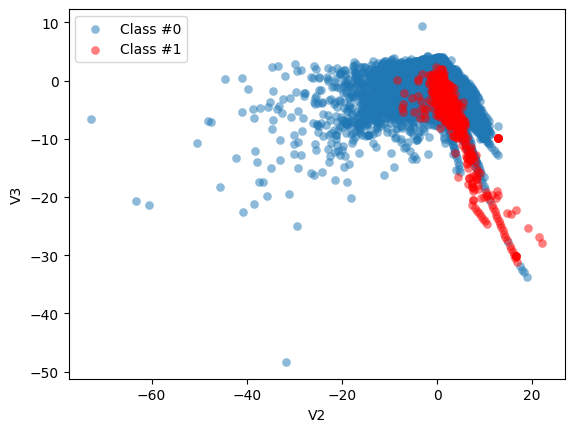

In [22]:
# Create X and y from the prep_data function 
X, y = prep_data(credit_data)

# Plot our data by running our plot data function on X and y
plot_data(X, y)

# Data Resampling

In [31]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], 
                label = "Class #0", alpha = 0.5, linewidth = 0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1],
                label = "Class #1", alpha = 0.5, linewidth = 0.15, c = 'r')
    plt.xlabel("V2")
    plt.ylabel("V3")
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], 
                X_resampled[y_resampled == 0, 1], 
                label = "Class #0", alpha = 0.5, linewidth = 0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], 
                X_resampled[y_resampled == 1, 1], 
                label = "Class #1", alpha = 0.5, linewidth = 0.15, c = 'r')
    plt.xlabel("V2")
    plt.title(method)
    plt.legend()
    plt.show()

# Random Oversampling

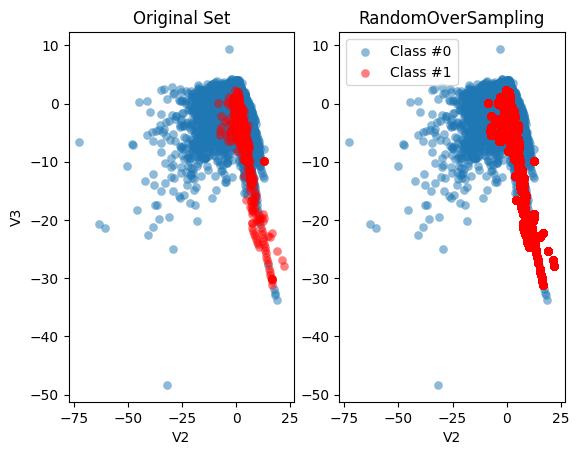

In [32]:
from imblearn.over_sampling import RandomOverSampler

method = RandomOverSampler()
X_resampled, y_resampled =  method.fit_resample(X, y)

compare_plot(X, y, X_resampled, y_resampled, 
             method = "RandomOverSampling")

# Synthetic Minority Oversampling Technique (SMOTE)

In [34]:

from imblearn.over_sampling import SMOTE
# Run the prep_data function
X, y = prep_data(credit_data)

# Define the resampling method
method = SMOTE()

# Create the resampled data set
X_resampled, y_resampled = method.fit_resample(X, y)

In [35]:
# Show the number of datapoints for non-fraudulent and fraudulent cases in the original data
pd.value_counts(pd.Series(y))

/tmp/ipykernel_109013/2576310197.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.Series(y))


0    284315
1       492
Name: count, dtype: int64

In [36]:
# Show the number of datapoints for non-fraudulent and fraudulent cases in the resampled data
pd.value_counts(pd.Series(y_resampled))

/tmp/ipykernel_109013/3119966833.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(pd.Series(y_resampled))


0    284315
1    284315
Name: count, dtype: int64

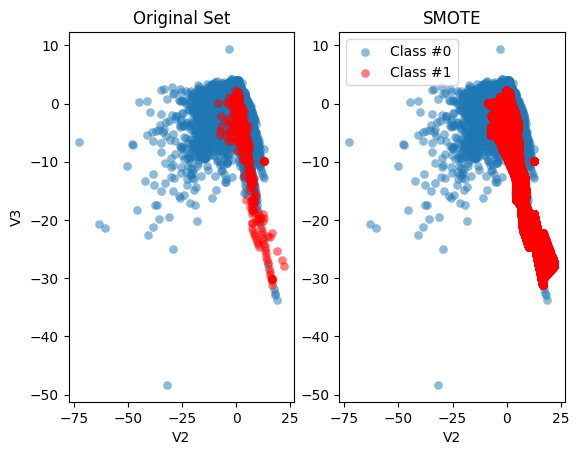

In [37]:
compare_plot(X, y, X_resampled, y_resampled, method = 'SMOTE')

# Applying Fraud Detection Algorithms

# Using ML Classification - Logistic Regression

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# Create the training and testing sets, with 30% of the data used for our test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Fit a logistic regression model to our data
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true = y_test, y_pred = predicted)
print('Confusion matrix:\n', conf_mat)

In [6]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
